In [29]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


### Wage prediction for construction and renovation businesses 

In [30]:
df = pd.read_csv('./pc_df.csv')
df.head(2)

,disasterNumber,state,incidentType,year,month,occ_code,occ_title,tot_emp,h_mean,a_mean,...,Mud/Landslide.1,Other.1,Severe Ice Storm.1,Severe Storm(s).1,Snow.1,Terrorist.1,Tornado.1,Toxic Substances.1,Tsunami.1,Volcano.1
0,1190,NE,Severe Storm(s),1997.0,11.0,41002,First-Line Supervisors and Managers/Supervisor...,10980.0,14.29,29720,...,0,0,0,1,0,0,0,0,0,0
1,1190,NE,Severe Storm(s),1997.0,11.0,49002,Sales Engineers,360.0,26.54,55210,...,0,0,0,1,0,0,0,0,0,0


In [31]:
y = df['wage_change']
#X = df.drop(['disasterNumber', 'year','occ_code'], axis = 1 , inplace = True)
X = df[[ 'month','tot_emp', 'h_mean',
       'a_mean', 'employment_rate_during', 'employment_rate_before',
       'employment_rate_after', 'employment_rate_change', 'wage_change',
       'impact_on_business', 'AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'Chemical',
       'Coastal Storm', 'Dam/Levee Break', 'Earthquake', 'Fire', 'Flood',
       'Freezing', 'Hurricane', 'Mud/Landslide', 'Other', 'Severe Ice Storm',
       'Severe Storm(s)', 'Snow', 'Terrorist', 'Tornado', 'Toxic Substances',
       'Tsunami', 'Volcano', 'Chemical.1', 'Coastal Storm.1',
       'Dam/Levee Break.1', 'Earthquake.1', 'Fire.1', 'Flood.1', 'Freezing.1',
       'Hurricane.1', 'Mud/Landslide.1', 'Other.1', 'Severe Ice Storm.1',
       'Severe Storm(s).1', 'Snow.1', 'Terrorist.1', 'Tornado.1',
       'Toxic Substances.1', 'Tsunami.1', 'Volcano.1']]

In [32]:
df.columns 

Index(['disasterNumber', 'state', 'incidentType', 'year', 'month', 'occ_code',
       'occ_title', 'tot_emp', 'h_mean', 'a_mean',
       ...
       'Mud/Landslide.1', 'Other.1', 'Severe Ice Storm.1', 'Severe Storm(s).1',
       'Snow.1', 'Terrorist.1', 'Tornado.1', 'Toxic Substances.1', 'Tsunami.1',
       'Volcano.1'],
      dtype='object', length=103)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)


In [34]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10,random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
Z_train = pca.transform(X_train)
pd.DataFrame(Z_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.013750e+05,1.013750e+05,1.013750e+05,1.013750e+05,1.013750e+05,1.013750e+05,1.013750e+05,1.013750e+05,1.013750e+05,1.013750e+05
mean,-4.218552e-16,-3.081651e-16,-5.815324e-17,-1.997711e-16,-4.573736e-17,-8.940485e-17,-7.433703e-18,4.655298e-17,-3.456832e-17,6.797837e-17
std,2.025200e+00,1.922871e+00,1.621609e+00,1.548201e+00,1.517124e+00,1.496130e+00,1.458127e+00,1.452874e+00,1.442328e+00,1.433409e+00
min,-5.771981e+00,-4.197195e+00,-5.416074e+00,-3.381880e+00,-8.114455e+00,-6.102662e+00,-1.206527e+01,-1.831733e+01,-2.085377e+01,-4.297421e+00
25%,-1.306551e+00,-1.560231e+00,-3.769685e-01,-8.692306e-01,-4.723041e-01,-1.586188e-01,-2.532282e-01,-9.635040e-02,-3.719426e-01,-3.453195e-01
50%,3.376924e-01,-2.675619e-01,3.437274e-01,-3.715778e-01,1.018604e-01,7.513249e-02,-6.511770e-02,3.034566e-02,-1.211232e-01,-1.327692e-01
75%,1.520223e+00,1.513149e+00,9.429096e-01,2.541069e-01,7.161943e-01,3.337945e-01,9.238567e-02,1.801769e-01,1.919155e-01,7.940299e-03
max,7.856100e+00,8.824790e+00,7.684892e+00,1.526538e+01,1.862470e+01,1.201424e+01,3.892713e+01,5.858446e+01,2.185015e+01,1.344409e+01


In [37]:
Z_test = pca.transform(X_test)

In [38]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {np.round(var_exp[:20],3)}')

Explained variance (first 20 components): [0.042 0.038 0.027 0.025 0.024 0.023 0.022 0.022 0.021 0.021]


In [39]:
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {np.round(cum_var_exp[:20],3)}')

Cumulative explained variance (first 20 components): [0.042 0.08  0.107 0.132 0.156 0.179 0.201 0.222 0.244 0.265]


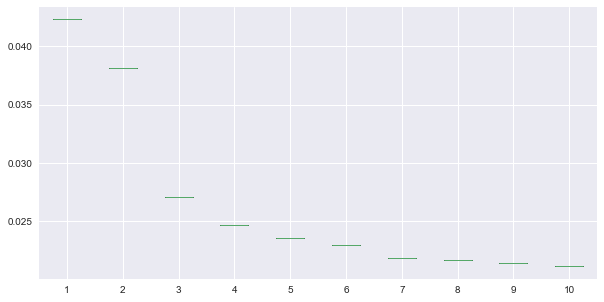

In [40]:
plt.figure(figsize = (10,5))
plt.boxplot(pd.DataFrame(pca.explained_variance_ratio_))
plt.savefig('ghjj')

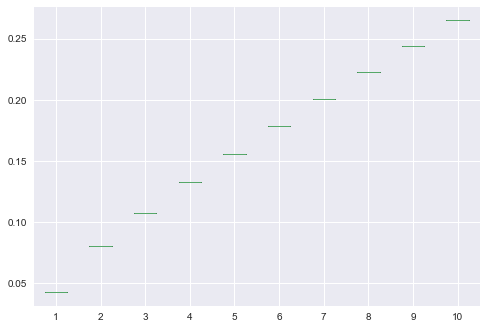

<Figure size 864x864 with 0 Axes>

In [41]:
plt.boxplot(pd.DataFrame(np.cumsum(var_exp)))
plt.figure(figsize = (12,12))
plt.savefig('dff')

### on the 6eme component , we can anly add 18 % of variability to our data frame 

In [42]:
pca = PCA(n_components = 10, random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
lm = LinearRegression()
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
lm.fit(Z_train, y_train)
print(f'Training Score: {lm.score(Z_train, y_train)}')
print(f'Testing Score: {lm.score(Z_test, y_test)}')

Training Score: 0.0030034668647260787
Testing Score: 0.003959654769986498


In [44]:
m = lm.predict(Z_train)

In [45]:
pd.DataFrame(m).describe().T

,count,mean,std,min,25%,50%,75%,max
0,101375.0,72759.090921,110864.455915,-2.384789e+06,49443.12547,99900.400606,135910.971477,666745.544243


### Desicion tree regressor 

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

In [47]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [48]:
print(f'the train score is:{reg.score(X_train, y_train)}')
print(f'the test score is:{reg.score(X_test, y_test)}')
print(f'the train cross validation score is:{cross_val_score(reg,X_train, y_train).mean()}')
print(f'the test cross validation score is:{ cross_val_score(reg,X_test, y_test).mean()}')

the train score is:1.0
the test score is:0.9922405854195194
the train cross validation score is:0.997595802426671
the test cross validation score is:0.9900611092406175


In [49]:
predict_train = reg.predict(X_train)
predict_test = reg.predict(X_test)
print(predict_train)
print(predict_test)

[ 0.00000000e+00  2.17612800e+03  1.73342400e+04 ...  7.56453466e+06
 -1.69340160e+04 -1.81699200e+03]
[ 12299.712   1773.792  78459.072 ...  -2658.096  -9320.832 -11378.736]


In [50]:
pd.DataFrame(predict_test).head(2)

,0
0,12299.712
1,1773.792


In [51]:
print(predict_test)

[ 12299.712   1773.792  78459.072 ...  -2658.096  -9320.832 -11378.736]


In [52]:
pd.DataFrame(predict_test).describe()

,0
count,4.993100e+04
mean,7.834591e+04
std,2.329386e+06
min,-5.584893e+07
25%,-9.789936e+03
50%,0.000000e+00
75%,1.394093e+04
max,1.280797e+08


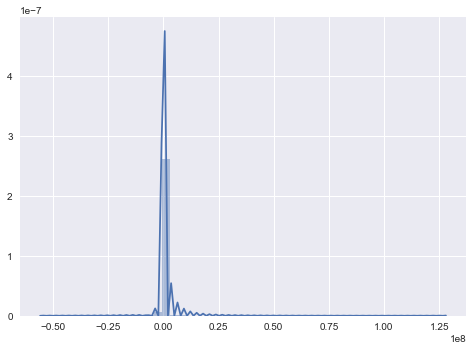

<Figure size 4320x216 with 0 Axes>

In [56]:
sns.distplot(pd.DataFrame(predict_test))
plt.figure(figsize = (60,3))
plt.savefig('fig')

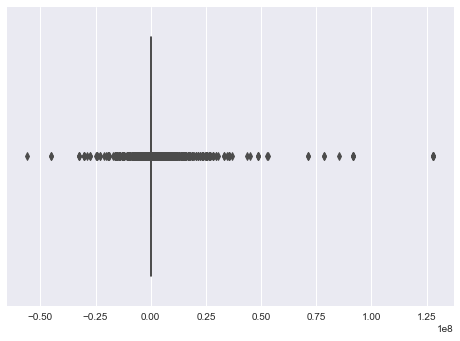

In [54]:
sns.boxplot(pd.DataFrame(predict_test),color ='r')